In [15]:
# # # # # # # # # # # # # # # # # 
# # #  Code for Project 1  # # #
# # # # # # # # # # # # # # # # #

# Libraries 
import numpy as np




# # # Trapezoidal Rule # # # 


def leftpoint(f,a,b,N):
    mysum = 0
    h = f
    x_array = np.linspace(a, b, N)
    w = (b-a)/(N-1)
    A_array = h(x_array)*w
    mysum = np.sum(A_array)
    mysum = mysum - A_array[N-1]      # left

    return mysum

def rightpoint(f,a,b,N):
    mysum = 0
    h = f
    x_array = np.linspace(a, b, N)
    w = (b-a)/(N-1)
    A_array = h(x_array)*w
    mysum = np.sum(A_array)
    mysum = mysum - A_array[0]     # right

    return mysum   

def trapezoid(f, a, b, N):
    return 0.5* (leftpoint(f, a, b, N) + rightpoint(f, a, b, N))

def sin(x):
    return (np.sin(sqrt(x)))**2

def sqrt(x):
    return np.sqrt(100*x)

def subintervals(Num_Method, i):
        result = Num_Method(sin, a, b, i)
        error = np.abs(soln - result)
        return (i, result, error)
        
soln = 1.00570254282573  # analytic solution via wolfram alpha
a = 0     # lower limit
b = 2     # upper limit

# Start with one single integration slice and work up from there to two, four, eight, and so forth. For each value of the number of slices N
# : your program should print out the number of slices, its estimate of the integral, and its estimate of the error on the integral.

N_array = [2**k for k in range(1, 15)]
for i in N_array:
    print("The number of slices, estimate of the integral, and estimated error respectively are:",subintervals(trapezoid, i))


The number of slices, estimate of the integral, and estimated error respectively are: (2, 0.9999753123966121, 0.0057272304291179355)
The number of slices, estimate of the integral, and estimated error respectively are: (4, 1.421250657401599, 0.41554811457586904)
The number of slices, estimate of the integral, and estimated error respectively are: (8, 1.0250832979205577, 0.01938075509482773)
The number of slices, estimate of the integral, and estimated error respectively are: (16, 0.9467370655877161, 0.05896547723801393)
The number of slices, estimate of the integral, and estimated error respectively are: (32, 0.9770282378161866, 0.028674305009543377)
The number of slices, estimate of the integral, and estimated error respectively are: (64, 0.9976716296671655, 0.008030913158564523)
The number of slices, estimate of the integral, and estimated error respectively are: (128, 1.003657838280232, 0.0020447045454980994)
The number of slices, estimate of the integral, and estimated error respec

In [34]:
def midpoint(f,a,b,N):        
    h = f
    mysum = 0
    x_array = np.linspace(a, b, N)
    w = (b-a)/(N-1)
    mid_array = [x + (w/2) for x in x_array]
    mid_array = np.array(mid_array)
    A_array = h(mid_array)*w
    mysum = np.sum(A_array)
    mysum = mysum - A_array[N-1]     # 
    return mysum   

def Simpson(f, a, b, N):
    return (1/3 * trapezoid(f, a, b, N)) + (2/3 * midpoint(f, a, b, N))

# Simpson with limits -1 to 1
# PLanning to do the u sub before sending to simpson

def sub(u): 
    x = ((b-a)*u/2)+(a+b)/2
    dx_over_du = 2/(b-a)
    return (1/dx_over_du)*(sin(x))

print("Simpson result for 1000 subintervals: ", Simpson(sub, -1, 1, 1000))



Simpson result for 1000 subintervals:  1.0057025413385308


In [36]:
# Guassian Qud

import scipy as sp

def quad(a, b, N):
    roots, weights = sp.special.roots_legendre(N)
    x = ((b-a)*roots/2)+(a+b)/2
    dx_over_du = 2/(b-a)
    return dx_over_du* np.sum(weights*sin(x))
N_array = [2**k for k in range(1, 10)]
for i in N_array:
    print ("N: ", i, "; Guassian quadrature result: ", quad(0, 2, i))

N:  2 ; Guassian quadrature result:  0.04681225905124554
N:  4 ; Guassian quadrature result:  1.4373009028449348
N:  8 ; Guassian quadrature result:  1.045246394223079
N:  16 ; Guassian quadrature result:  1.0057025428257274
N:  32 ; Guassian quadrature result:  1.0057025428257247
N:  64 ; Guassian quadrature result:  1.0057025428257258
N:  128 ; Guassian quadrature result:  1.005702542825726
N:  256 ; Guassian quadrature result:  1.0057025428257265
N:  512 ; Guassian quadrature result:  1.005702542825715


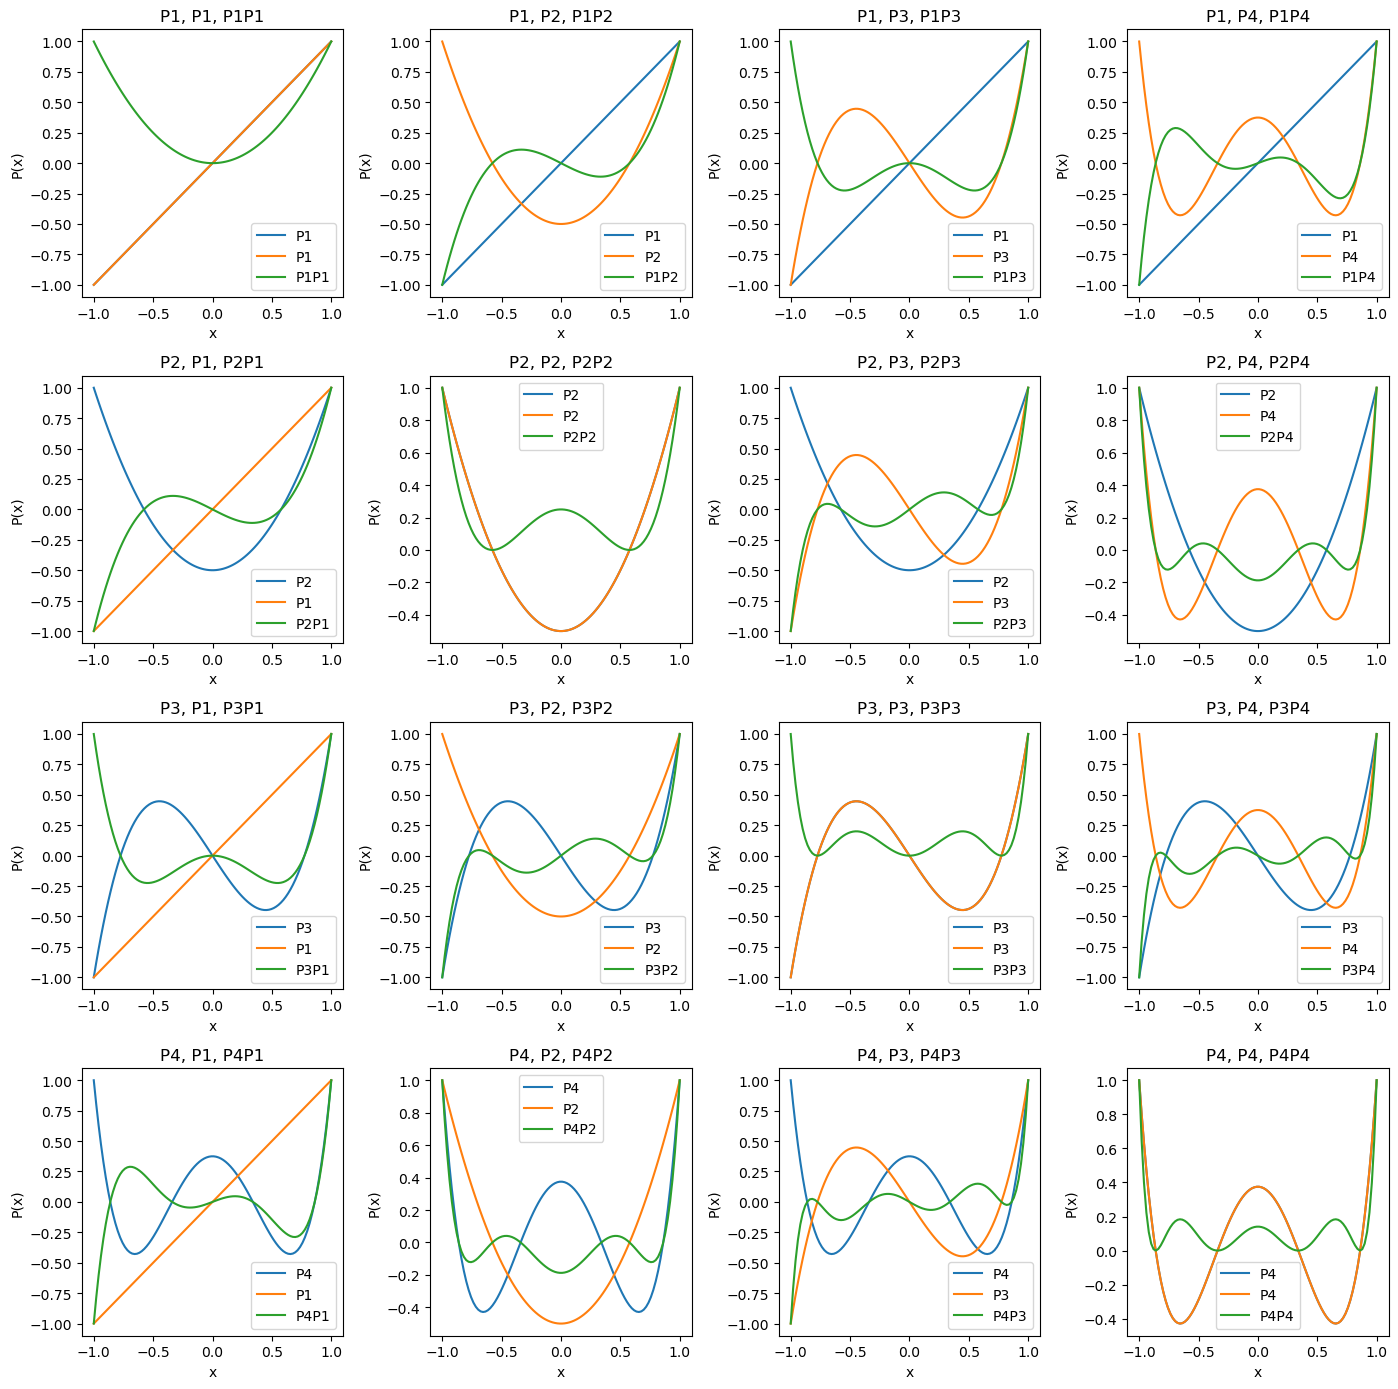

In [59]:
# LEgendre polynomials plots

import pylab as py
import scipy as sp
P_i = [sp.special.legendre(i) for i in range(1, 5)]
P_j = [sp.special.legendre(i) for i in range(1, 5)]

x = np.linspace(-1, 1, 100)
py.figure(figsize=(14, 14))
for i in range(4):
    for j in range(4):
        Pi = P_i[i](x)
        Pj = P_j[j](x)
        PiPj = Pi*Pj

        axis= py.subplot(4, 4, i*4 +j +1)
        axis.plot(x, Pi, label=f"P{i+1}")
        axis.plot(x, Pj, label=f"P{j+1}")
        axis.plot(x, PiPj, label=f"P{i+1}P{j+1}")

        axis.set_title(f"P{i+1}, P{j+1}, P{i+1}P{j+1}")
        axis.set_xlabel("x")
        axis.set_ylabel("P(x)")
        axis.legend()

py.tight_layout()
py.show()

In [1]:
# Extension 1

import scipy as sp
import numpy as np

def f(y):
    return ((y**2) / sqrt(y))

def sqrt(y):
    return np.sqrt(2-y)

Analytic_result = 6.0339778661252055415538718899613784685639333349416451122205002154

def yquad(a, b, N):
    roots, weights = sp.special.roots_legendre(N)
    y = ((b-a)*roots/2)+(a+b)/2
    dy_over_du = 2/(b-a)
    return dy_over_du* np.sum(weights*f(y))
N_array = [2**k for k in range(1, 15)]
for i in N_array:
    print ("N: ", i, "; Guassian quadrature result: ", yquad(0, 2, i))

N:  2 ; Guassian quadrature result:  3.9692982723109007
N:  4 ; Guassian quadrature result:  4.9250702034261815
N:  8 ; Guassian quadrature result:  5.45246010406148
N:  16 ; Guassian quadrature result:  5.735191388582638
N:  32 ; Guassian quadrature result:  5.8823916391313436
N:  64 ; Guassian quadrature result:  5.957610922026381
N:  128 ; Guassian quadrature result:  5.9956475709606725
N:  256 ; Guassian quadrature result:  6.014775580804075
N:  512 ; Guassian quadrature result:  6.02436738425289
N:  1024 ; Guassian quadrature result:  6.02917028349726
N:  2048 ; Guassian quadrature result:  6.031573487323556
N:  4096 ; Guassian quadrature result:  6.0327755310654485
N:  8192 ; Guassian quadrature result:  6.033376664427672
N:  16384 ; Guassian quadrature result:  6.033677240757653


I'm not gonna get 10 decimal points of accuracy like this.

In [12]:
# y = 2sin**2(t)

def f(t):
    return (16*(np.sin(t)**5)/np.sqrt(2))

Analytic_result = 6.0339778661252055415538718899613784685639333349416451122205002154

def tquad(a, b, N):
    roots, weights = sp.special.roots_legendre(N)
    t = ((b-a)*roots/2)+(a+b)/2
    dt_over_du = (b-a)/2
    return dt_over_du* np.sum(weights*f(t))
N_array = [2**k for k in range(1, 15)]
for i in N_array:
    print ("N: ", i, "; Guassian quadrature result: ", tquad(0, np.pi/2, i))

print(np.sqrt(8192)/15)


N:  2 ; Guassian quadrature result:  6.743764914016293
N:  4 ; Guassian quadrature result:  6.0387866085191595
N:  8 ; Guassian quadrature result:  6.0339778683835155
N:  16 ; Guassian quadrature result:  6.033977866125211
N:  32 ; Guassian quadrature result:  6.03397786612521
N:  64 ; Guassian quadrature result:  6.033977866125211
N:  128 ; Guassian quadrature result:  6.033977866125267
N:  256 ; Guassian quadrature result:  6.033977866125251
N:  512 ; Guassian quadrature result:  6.033977866125115
N:  1024 ; Guassian quadrature result:  6.03397786612515
N:  2048 ; Guassian quadrature result:  6.0339778661243715
N:  4096 ; Guassian quadrature result:  6.03397786612477
N:  8192 ; Guassian quadrature result:  6.033977866125404
N:  16384 ; Guassian quadrature result:  6.033977866125492
6.033977866125206
